<a href="https://www.kaggle.com/code/alfianady/eksplorasi-penjualan-pada-dataset-superstore-sale?scriptVersionId=152181796" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Eksplorasi penjualan pada dataset Superstore Sales

### Analisa ini menggunakan dataset : https://www.kaggle.com/datasets/roopacalistus/superstore/code

## Mulai Presentasi

1. Pendahuluan:

Saya akan memulai dengan memberikan latar belakang singkat tentang dataset yang kita miliki, mungkin juga menjelaskan tujuan dari analisis ini. Dataset ini berisi detail penjualan dari berbagai toko dari waralaba supermarket yang memiliki beberapa toko di berbagai tempat di seluruh Amerika Serikat.

<br>Hal yang akan kita lihatt :
1. Gambaran Umum Penjualan
2. Analisis Segmentasi Pelanggan
3. Analisis Mode Pengiriman
4. Analisis Geografis
5. Analisis Sub-Kategori

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

## Reading Data

In [2]:
data=pd.read_csv("/kaggle/input/superstore/SampleSuperstore.csv")

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Looking for duplicates data, if there is any duplicates we will remove them

In [6]:
data.duplicated().sum()


17

In [7]:
data.drop_duplicates(inplace= True)


Checking if there is null data

In [8]:
print(data.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


2. Gambaran Umum Penjualan:

Pertama-tama, kita akan lihat bagaimana penjualan terdistribusi di antara kategori produk yang kita tawarkan.
Visualisasi barplot akan memberikan gambaran jelas tentang kontribusi penjualan dari masing-masing kategori.

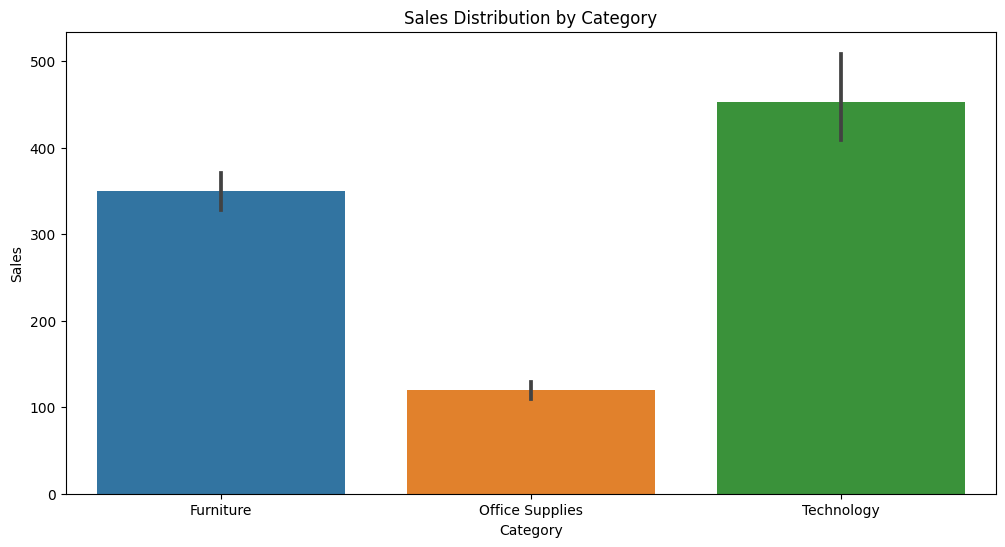

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=data)
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

3. Analisis Segmentasi Pelanggan:

Mari kita pahami bagaimana penjualan dan profit terkait dengan segmen pelanggan yang berbeda.
Visualisasi barplot untuk menunjukkan perbandingan penjualan dan profit di antara segmen pelanggan dan kategori produk

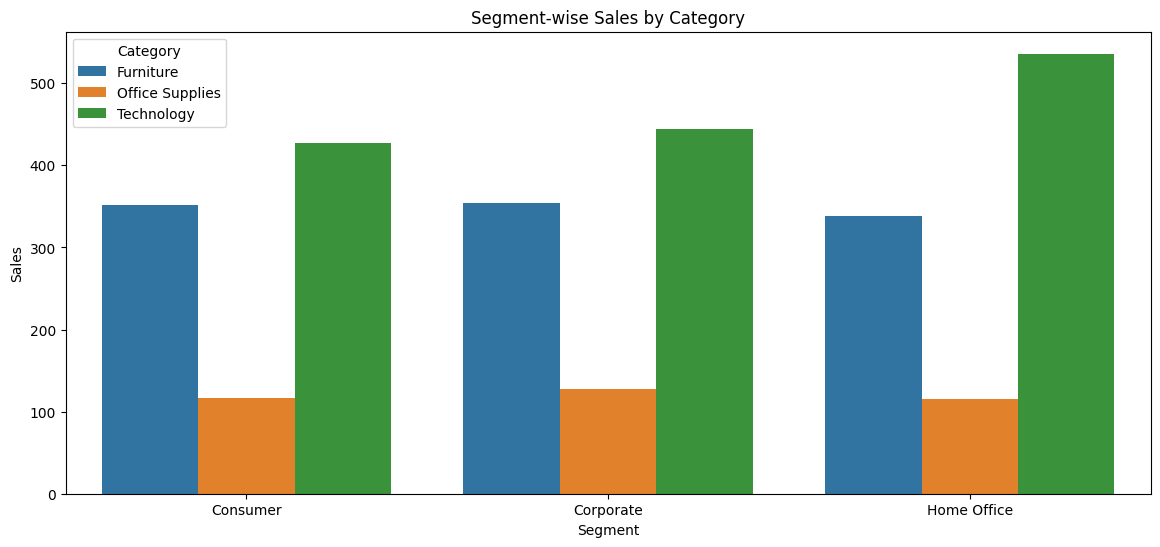

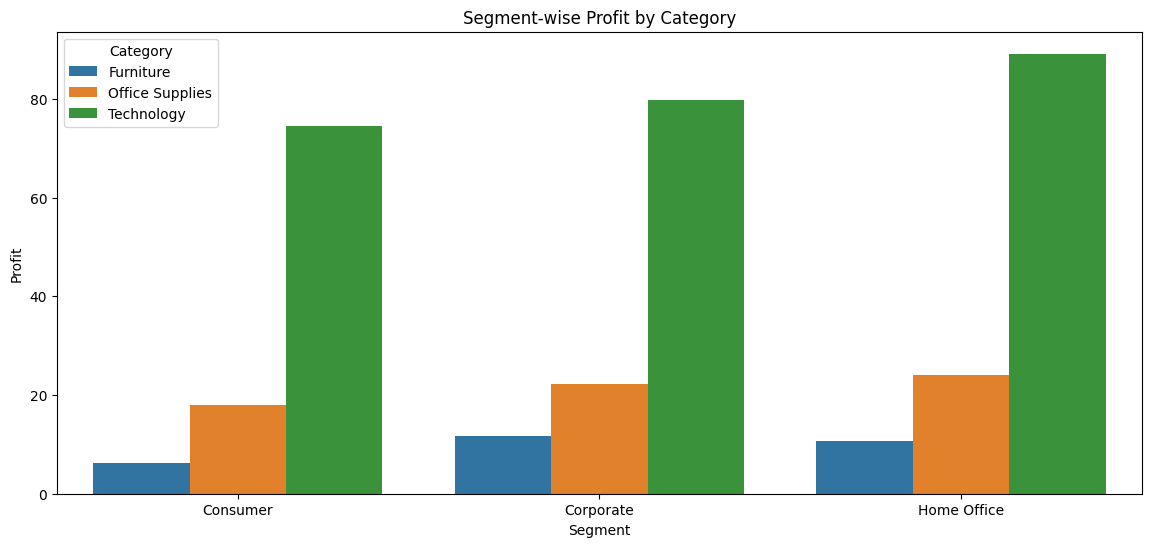

In [11]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Segment', y='Sales', data=data, hue='Category', errorbar=None)
plt.title('Segment-wise Sales by Category')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.legend(title='Category')
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='Segment', y='Profit', data=data, hue='Category', errorbar=None)
plt.title('Segment-wise Profit by Category')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.legend(title='Category')
plt.show()


4. Analisis Mode Pengiriman:

Apakah mode pengiriman berpengaruh pada penjualan dan profit? Kita akan eksplorasi ini.
Visualisasi barplot untuk membandingkan penjualan dan profit berdasarkan mode pengiriman dan kategori produk.

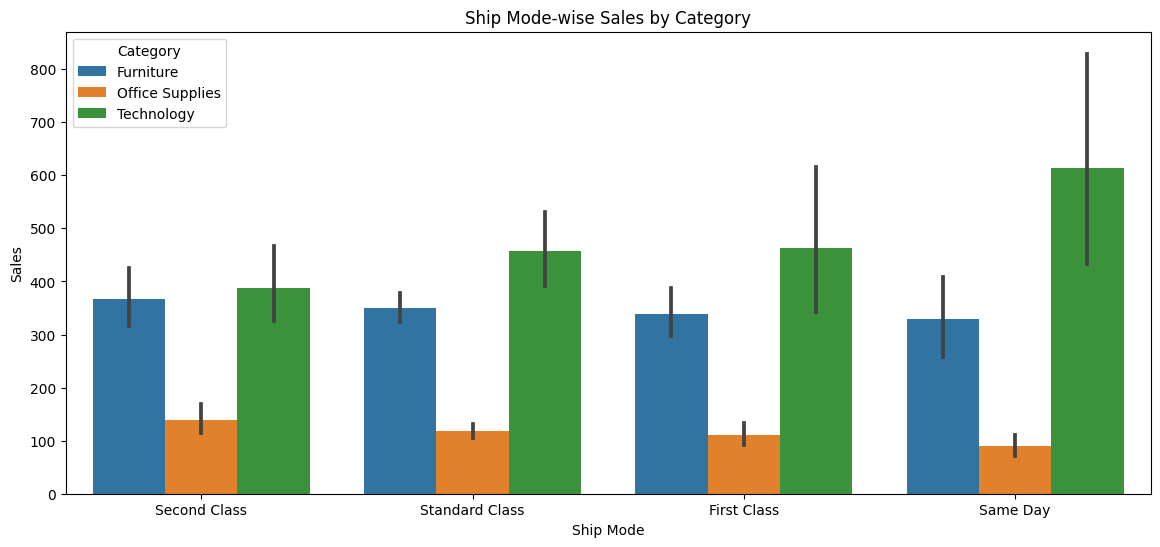

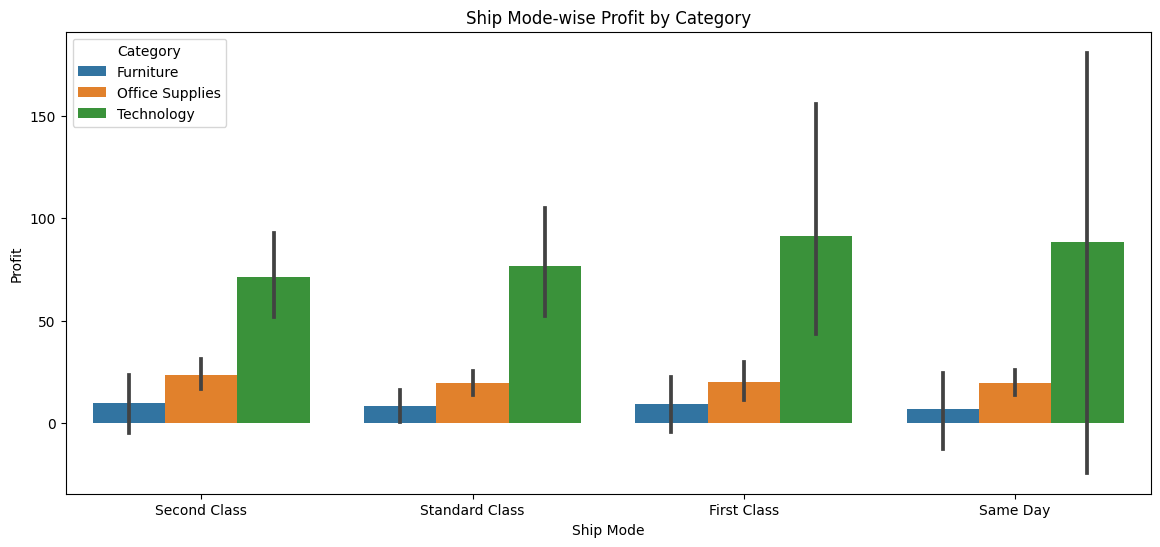

In [12]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Ship Mode', y='Sales', data=data, hue='Category')
plt.title('Ship Mode-wise Sales by Category')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.legend(title='Category')
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='Ship Mode', y='Profit', data=data, hue='Category')
plt.title('Ship Mode-wise Profit by Category')
plt.xlabel('Ship Mode')
plt.ylabel('Profit')
plt.legend(title='Category')
plt.show()


5. Analisis Geografis:

Mari kita lihat bagaimana performa penjualan dan profit di berbagai wilayah, negara bagian, dan kota.
Visualisasi barplot akan menunjukkan sebaran penjualan dan profit di wilayah-wilayah tertentu.


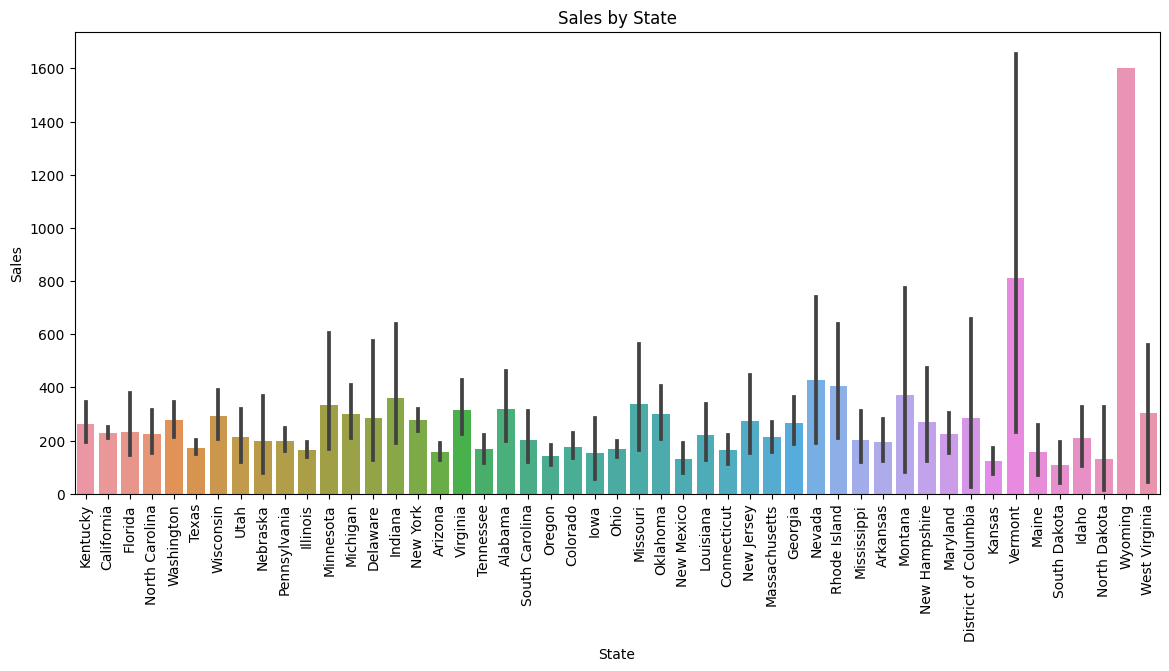

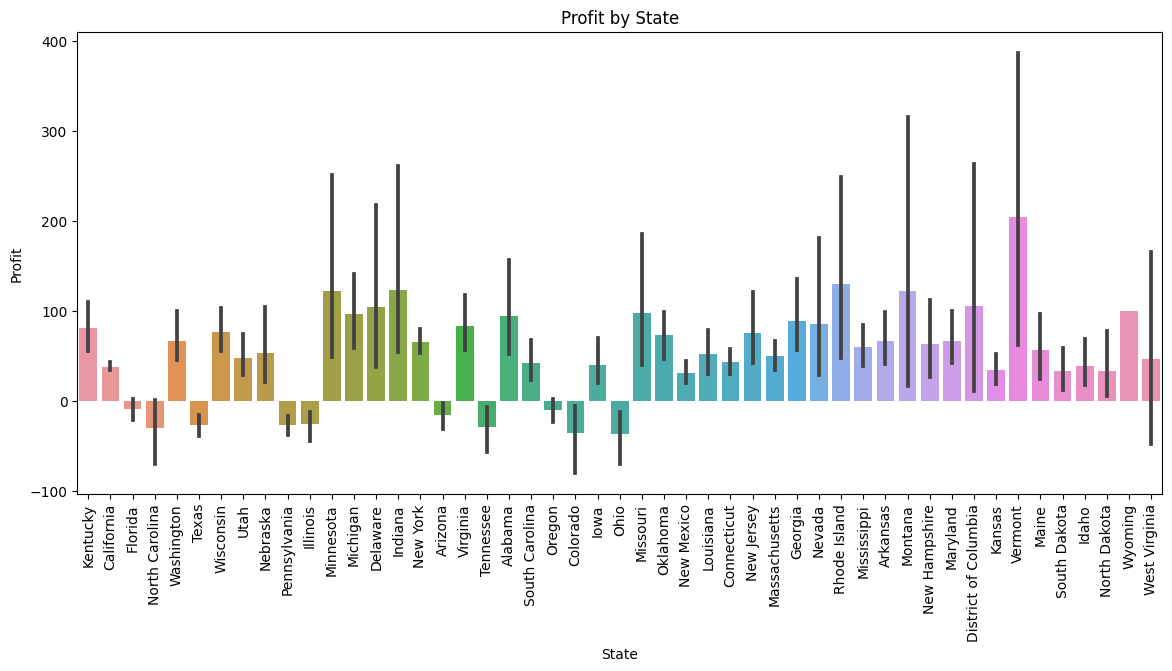

In [13]:
plt.figure(figsize=(14, 6))
sns.barplot(x='State', y='Sales', data=data)
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='State', y='Profit', data=data)
plt.title('Profit by State')
plt.xlabel('State')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.show()


6. Analisis Sub-Kategori:

Selanjutnya, kita akan fokus pada performa sub-kategori produk kita.
Barplot kembali digunakan untuk menyoroti perbandingan penjualan dan profit di antara sub-kategori.

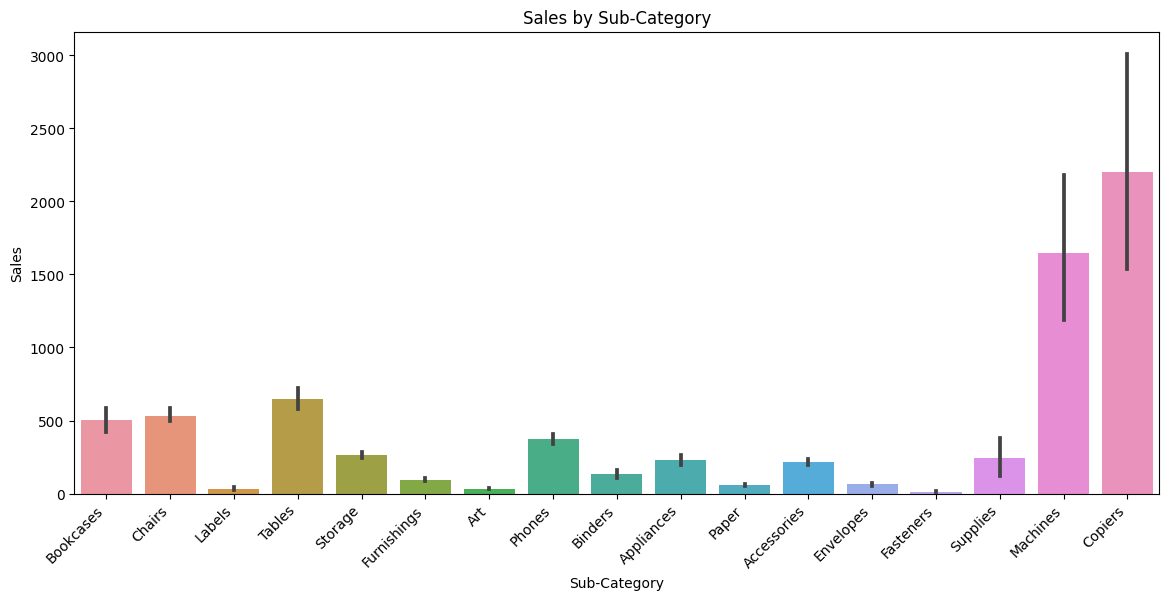

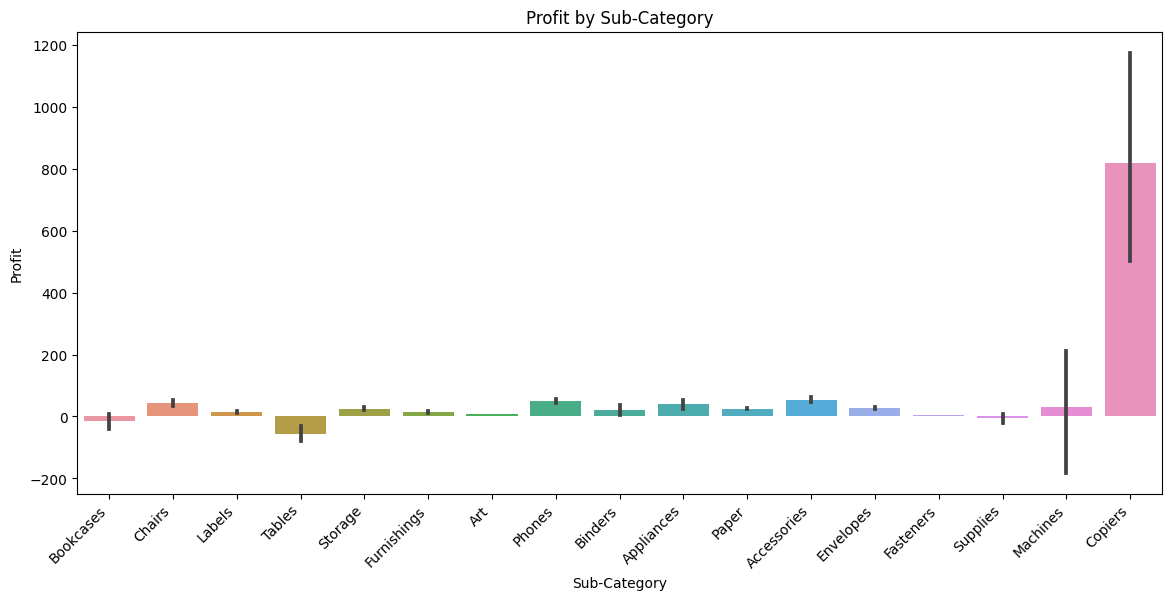

In [14]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Sub-Category', y='Sales', data=data)
plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='Sub-Category', y='Profit', data=data)
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.show()
